In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "iphone_purchase_records.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "piyushborhade/knn-algorithms",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

C:\Users\USER PC\AppData\Local\Temp\ipykernel_25772\2041828141.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|█████████████████████████████████████████████████████████████████████████████| 7.14k/7.14k [00:00<00:00, 5.06MB/s]

First 5 records:    Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0


In [5]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [7]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
X = df[['Age', 'Salary']]
y = df['Purchase Iphone']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
# 1. Check for null values
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # start with K=5
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred = knn.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9
[[48  4]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        52
           1       0.86      0.86      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
X, y = load_iris(return_X_y=True)

# Define KNN model
knn = KNeighborsClassifier()

# Define parameter grid (values of K to try)
param_grid = {'n_neighbors': range(1, 21)}

# Grid Search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Best K
print("Best K:", grid_search.best_params_['n_neighbors'])
print("Best Accuracy:", grid_search.best_score_)

Best K: 6
Best Accuracy: 0.9800000000000001


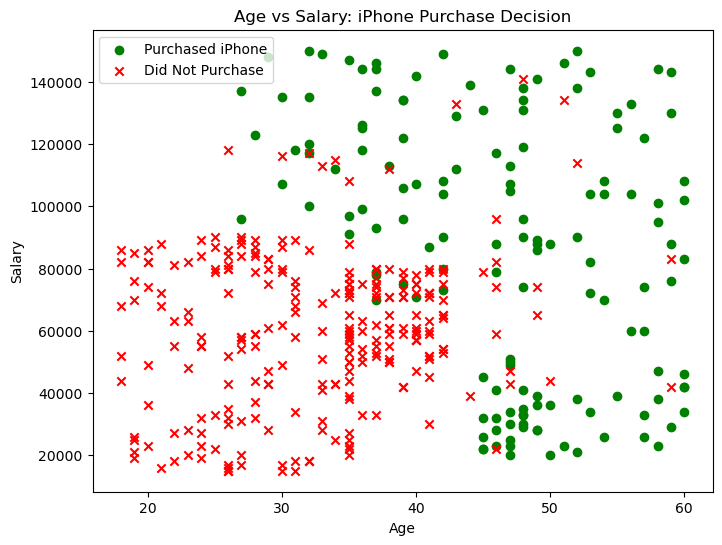

In [34]:
import matplotlib.pyplot as plt

# Assume df is your DataFrame
X = df[['Age', 'Salary']]
y = df['Purchase Iphone']

# Scatter plot
plt.figure(figsize=(8,6))

# Plot points for "Purchased"
plt.scatter(X[y==1]['Age'], X[y==1]['Salary'], 
            color='green', label='Purchased iPhone', marker='o')

# Plot points for "Not Purchased"
plt.scatter(X[y==0]['Age'], X[y==0]['Salary'], 
            color='red', label='Did Not Purchase', marker='x')

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary: iPhone Purchase Decision')
plt.legend()
plt.show()